In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

In [2]:
plt.figure(figsize=[15,15])

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

In [3]:
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('train.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# We don't need to know the name of the person who died or who did not. so lets pull that appart from our dataframe.
df.drop('Name',axis=1,inplace=True)

In [7]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [9]:
df.drop('Ticket',axis=1,inplace=True)

In [10]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


### 4 C's : Correcting,completing,creating and converting.

In [11]:
print('Features with null values :')
print(df.isna().sum())

Features with null values :
PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [12]:
# filling age college with mean values
df['Age'].fillna(df['Age'].median(),inplace=True)

In [13]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [14]:
df.drop(['Cabin'],axis=1,inplace=True)

In [15]:
print('Features with null values :')
print(df.isna().sum())

Features with null values :
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


Now there are no NULL values

In [16]:
df.drop('PassengerId',axis=1,inplace=True)

In [17]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [18]:
df = pd.get_dummies(data=df)

In [19]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [20]:
df.isna().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

## Insights

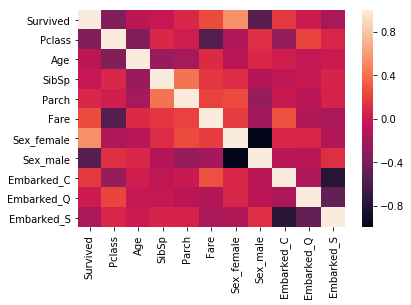

In [21]:
sns.heatmap(df.corr())

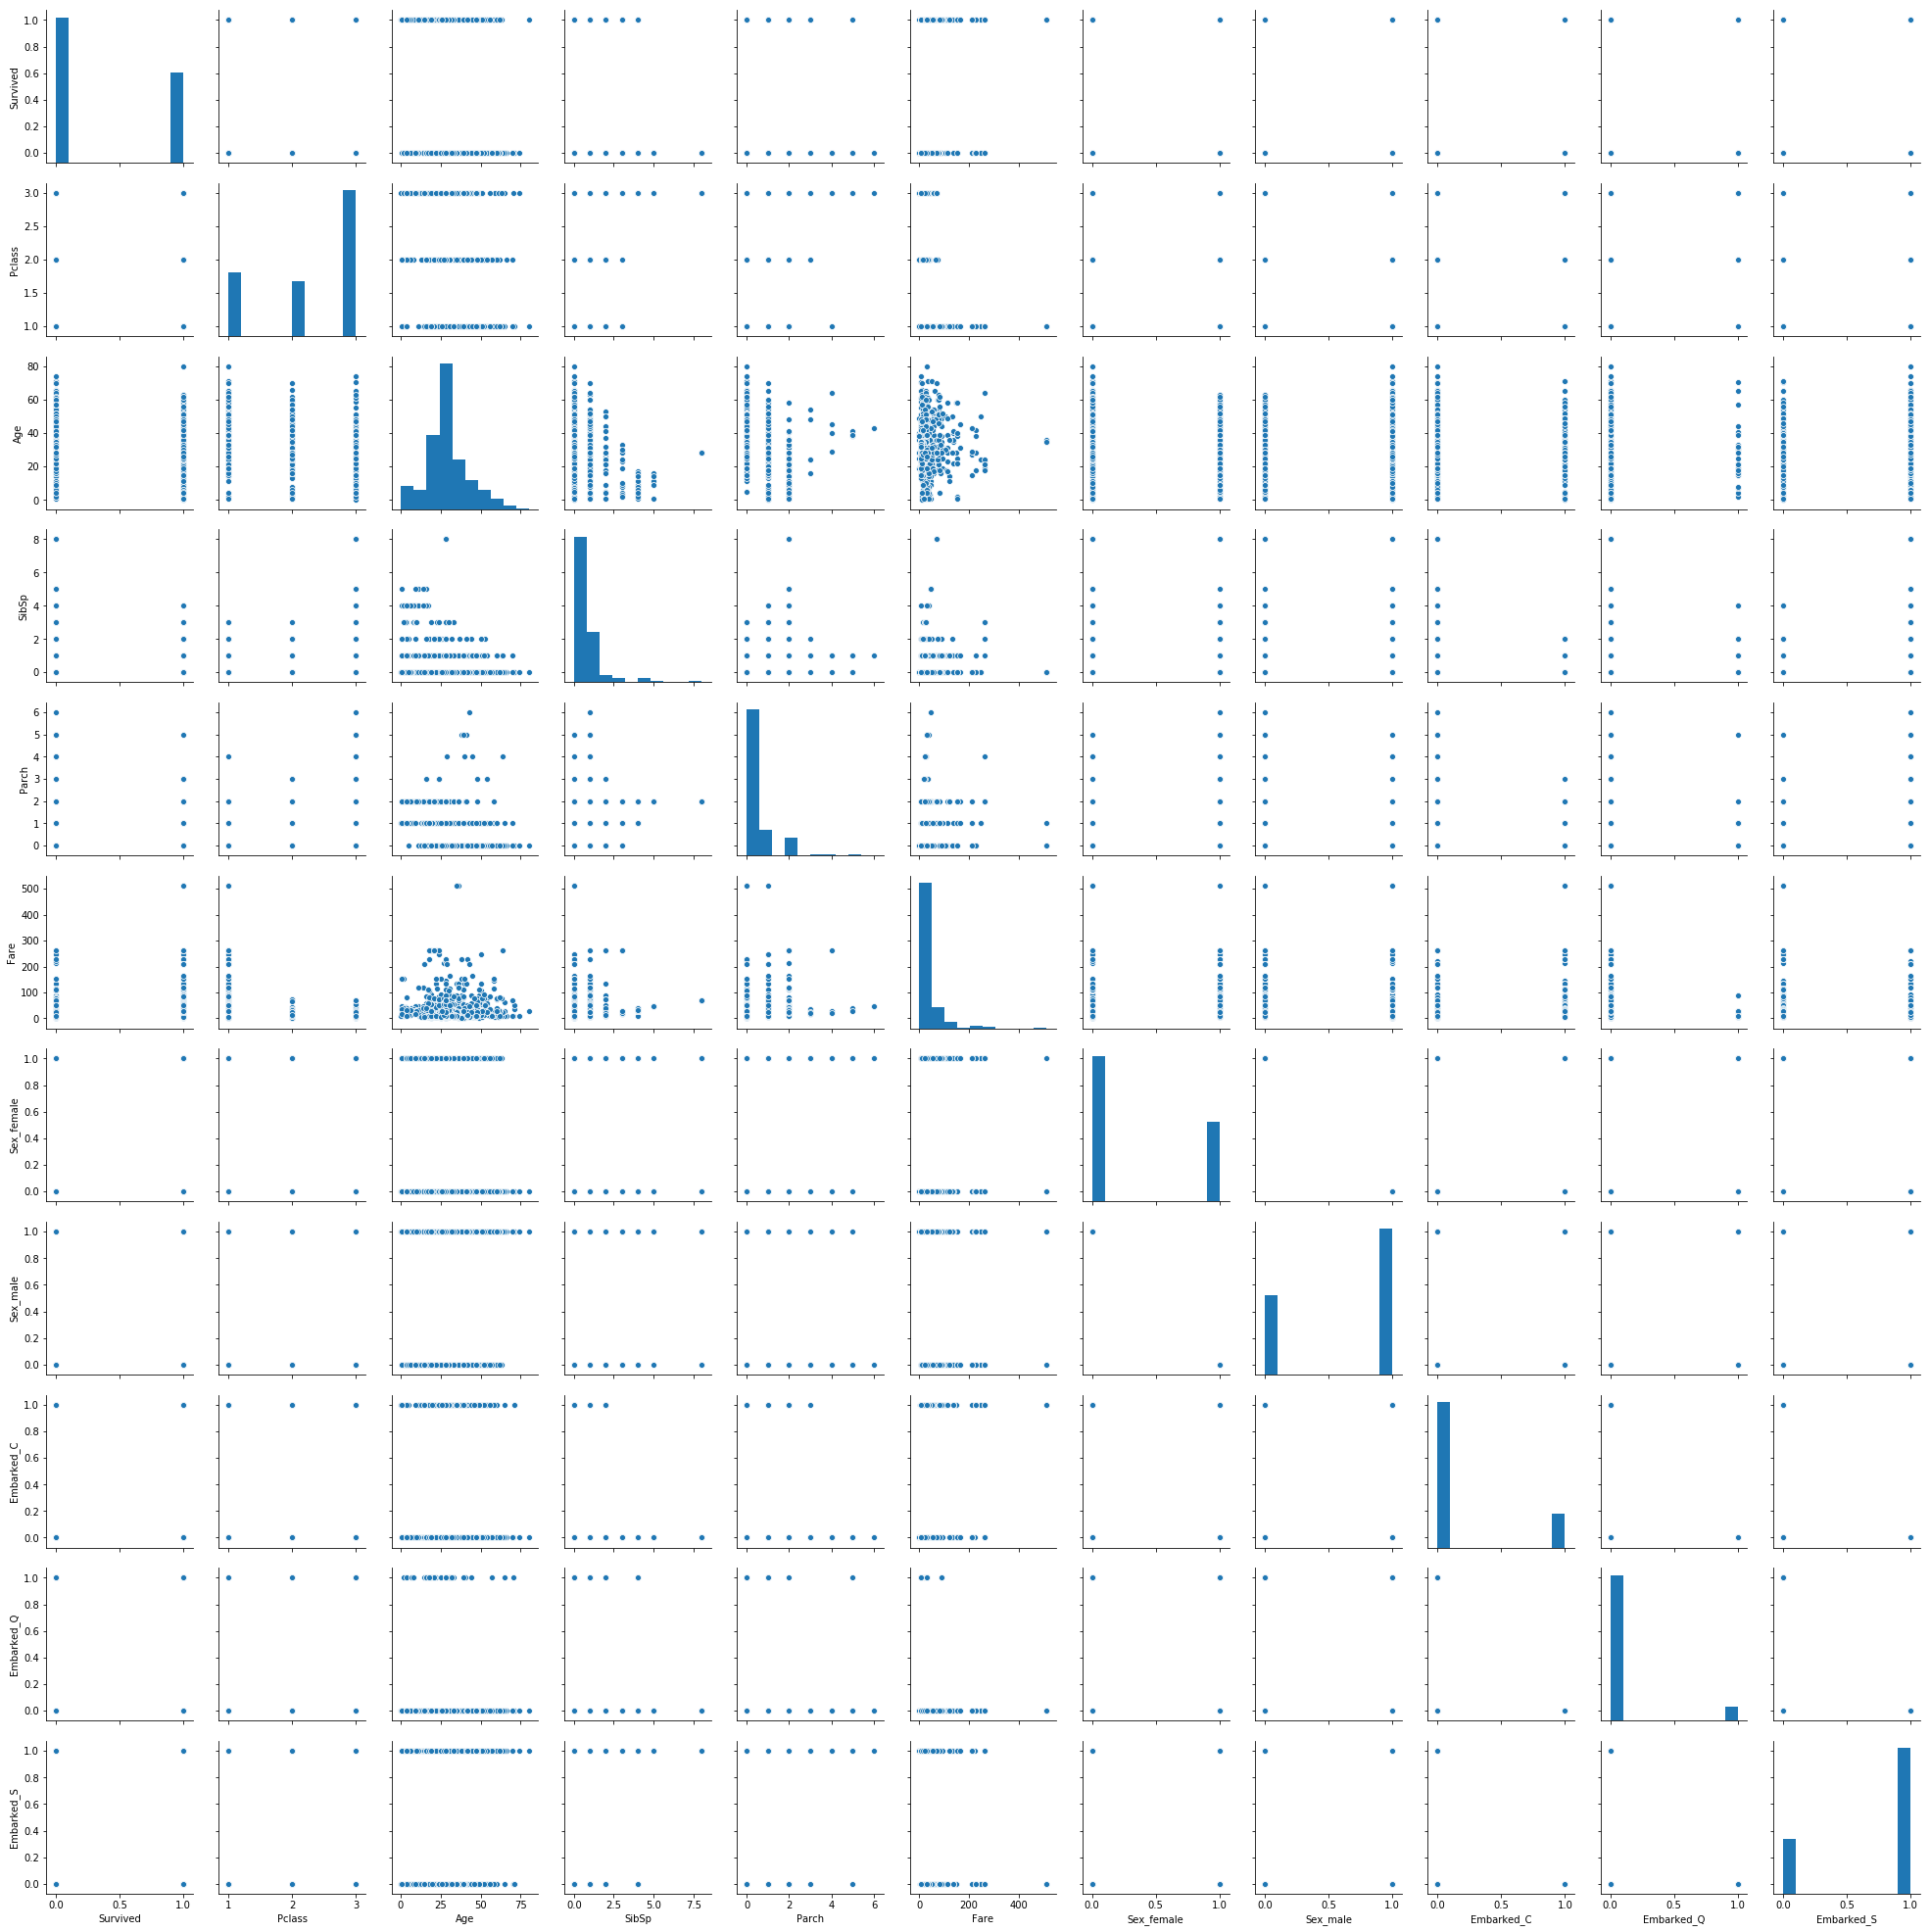

In [22]:
sns.pairplot(df)

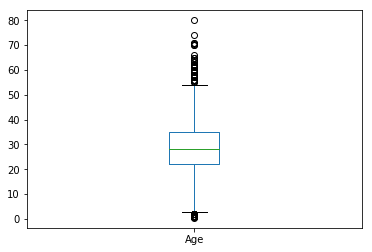

In [23]:
df['Age'].plot(kind='box')

We see that mean age is around 30, so mostly young people went.

## Spliting and clearning data for model

In [24]:
train = pd.read_csv('train.csv', header = 0, dtype={'Age': np.float64})
test  = pd.read_csv('test.csv' , header = 0, dtype={'Age': np.float64})
train['Age'].fillna(train['Age'].mean(),inplace=True)

In [25]:
train['Embarked'].fillna(train['Embarked'].mode()[0],inplace=True)

In [26]:
test['Age'].fillna(test['Age'].mean(),inplace=True)
test['Fare'].fillna(test['Fare'].mean,inplace=True)
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [27]:
full_data=[train,test]

for dataset in full_data:
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp',\
                 'Parch']
train = train.drop(drop_elements, axis = 1)

test  = test.drop(drop_elements, axis = 1)

print (train.head(10))

train = train.values
test  = test.values

   Survived  Pclass  Sex        Age     Fare  Embarked
0         0       3    1  22.000000   7.2500         0
1         1       1    0  38.000000  71.2833         1
2         1       3    0  26.000000   7.9250         0
3         1       1    0  35.000000  53.1000         0
4         0       3    1  35.000000   8.0500         0
5         0       3    1  29.699118   8.4583         2
6         0       1    1  54.000000  51.8625         0
7         0       3    1   2.000000  21.0750         0
8         1       3    0  27.000000  11.1333         0
9         1       2    0  14.000000  30.0708         1


## Building model for different classifiers :


In [28]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,log_loss

In [29]:
classifiers = [SVC(probability=True),KNeighborsClassifier(3),DecisionTreeClassifier(),
               RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),
               LogisticRegression(),GaussianNB()]

In [30]:
log_cols = ['Classifier', 'Accuracy']

In [31]:
log = pd.DataFrame(columns=log_cols)

In [32]:
from sklearn.model_selection import StratifiedShuffleSplit

In [33]:
sss = StratifiedShuffleSplit(n_splits=10,test_size=0.1,random_state=0)

In [34]:
X = train[0::, 1::]
y = train[0::, 0]

In [35]:
accuracy_dict = {}

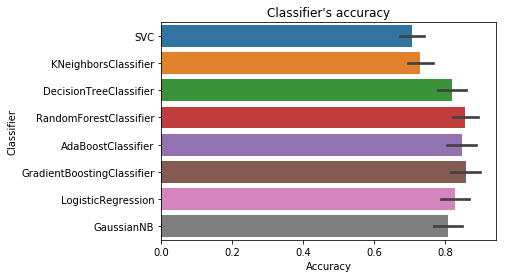

In [37]:
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    for clf in classifiers:
        name = clf.__class__.__name__
        clf.fit(X_train,y_train)
        training_prediction = clf.predict(X_test)
        acc = accuracy_score(y_test,training_prediction)
        if name in accuracy_dict:
            accuracy_dict[name] += acc
        else:
            accuracy_dict[name] = acc

for clf in accuracy_dict:
    accuracy_dict[clf] = accuracy_dict[clf]/10
    log_entry = pd.DataFrame([[clf,accuracy_dict[clf]]],columns=log_cols)
    log = log.append(log_entry)
    
plt.xlabel("Mean accuracy")
plt.title("Classifier's accuracy")
plt.ylabel("Classifiers")
sns.barplot(x='Accuracy',y='Classifier',data=log)
            

In [40]:
log

,Classifier,Accuracy
0,SVC,0.672222
0,KNeighborsClassifier,0.694444
0,DecisionTreeClassifier,0.777778
0,RandomForestClassifier,0.820000
0,AdaBoostClassifier,0.805556
0,GradientBoostingClassifier,0.816667
0,LogisticRegression,0.788889
0,GaussianNB,0.768889
0,SVC,0.739444
0,KNeighborsClassifier,0.763889


## Predicting using GradientBoostingClassifier

In [41]:
gbc = GradientBoostingClassifier()

In [43]:
gbc.fit(X_train,y_train)
gpred = gbc.predict(X_test)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

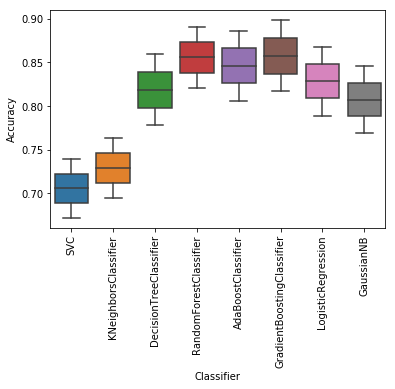

In [50]:
pb = sns.boxplot(data=log,x='Classifier',y='Accuracy')
plt.xticks(rotation=90)

In [51]:
from sklearn.metrics import confusion_matrix

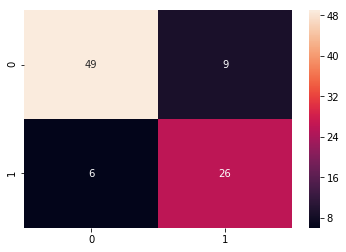

In [53]:
sns.heatmap(confusion_matrix(gpred,y_test),annot=True)

In [63]:
gbc.feature_importances_

array([0.16648067, 0.46533265, 0.13781888, 0.21435506, 0.01601274])

Text(0.5, 1.0, 'Feature importance for gbc')

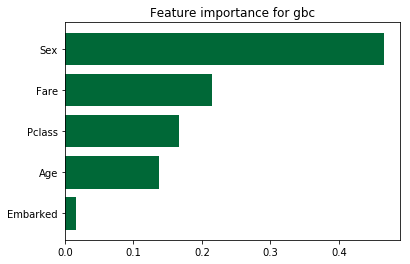

In [65]:
pd.Series(gbc.feature_importances_,['Pclass','Sex','Age','Fare','Embarked']).sort_values(ascending=True).plot.barh(width=0.8,cmap='RdYlGn_r')
plt.title("Feature importance for gbc")

In [66]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score,cross_val_predict
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('SVC RBF',SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RandomForest',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LogisticRegression',LogisticRegression(C=0.05)),
                                              ('DecisionTree',DecisionTreeClassifier(random_state=0)),
                                              ('GaussianNB',GaussianNB()),
                                              ('SVC Linear',SVC(kernel='linear',probability=True)),
                                              ('AdaBoosting',AdaBoostClassifier()),
                                              ('GradientBoosting',GradientBoostingClassifier())
                                             ], 
                       voting='soft').fit(X_train,y_train)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(X_test,y_test))
cross=cross_val_score(ensemble_lin_rbf,X,y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8222222222222222
The cross validated score is 0.8249645329701509
